<a href="https://colab.research.google.com/github/mdmmmoises/DATASET/blob/main/IABO_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CARACTERIZACIÓN, CREACIÓN DE DATASET Y LECTURA**

***IABO - Inteligencia Artificial de Borde***

Javier Chaparro

#**Caracterización de las señales de la IMU**

En esta primera parte se hace una explicación de la forma de crear un dataset a partir de señales de un sensor inercial embebido en un SoC 33BLEsense desde un archivo de Excel.

Lectura de los datos de archivo de excel

Archivos recomendados: 
1. Adelante.xlsx
2. Retroceder.xlsx
3. Giro izquierda.xlsx
4. Giro derecha.xlsx
5. Detener.xlsx

In [10]:
!git clone https://github.com/mdmmmoises/DATASET.git

Cloning into 'DATASET'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 55 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (55/55), done.


Se instalan librarias para leer archivo XLSX

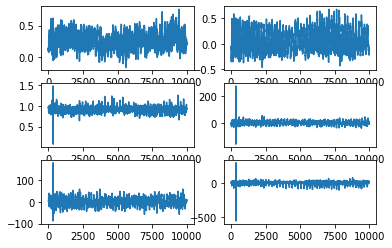

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
wb=xlrd.open_workbook("/content/DATASET/Adelante.xlsx")
sheet = wb.sheet_by_index(0)
# Lectura de las variables de la IMU
ax=sheet.col_values(0)
ay=sheet.col_values(1)
az=sheet.col_values(2)
gx=sheet.col_values(3)
gy=sheet.col_values(4)
gz=sheet.col_values(5)
# Gráfica de las variables
plt.subplot(321)
plt.plot(ax)
plt.subplot(322)
plt.plot(ay)
plt.subplot(323)
plt.plot(az)
plt.subplot(324)
plt.plot(gx)
plt.subplot(325)
plt.plot(gy)
plt.subplot(326)
plt.plot(gz)

In [12]:
N=10.0                      # Número de muestras
nV=np.array(np.shape(ax))   # Número de muestras de la señal
segment = np.floor(nV/N)    # Número de segmetos de la señal
print("Segmentos : ",segment)

Segmentos :  [999.]


In [13]:
wb=xlrd.open_workbook("/content/DATASET/Adelante.xlsx")
sheet = wb.sheet_by_index(0)
ax=sheet.col_values(0)
ay=sheet.col_values(1)
az=sheet.col_values(2)
gx=sheet.col_values(3)
gy=sheet.col_values(4)
gz=sheet.col_values(5)
var_ventana_axPAdelante=[]
var_ventana_ayPAdelante=[]
var_ventana_azPAdelante=[]
var_ventana_gxPAdelante=[]
var_ventana_gyPAdelante=[]
var_ventana_gzPAdelante=[]

for i in range (0,np.int(segment)):
  ventana_axPA=ax[int(i*N):int((i+1)*N)]
  ventana_ayPA=ay[int(i*N):int((i+1)*N)]
  ventana_azPA=az[int(i*N):int((i+1)*N)]
  ventana_gxPA=gx[int(i*N):int((i+1)*N)]
  ventana_gyPA=gy[int(i*N):int((i+1)*N)]
  ventana_gzPA=gz[int(i*N):int((i+1)*N)]
  var_ventana_axPAdelante.append(np.var(ventana_axPA))
  var_ventana_ayPAdelante.append(np.var(ventana_ayPA))
  var_ventana_azPAdelante.append(np.var(ventana_azPA))
  var_ventana_gxPAdelante.append(np.var(ventana_gxPA))
  var_ventana_gyPAdelante.append(np.var(ventana_gyPA))
  var_ventana_gzPAdelante.append(np.var(ventana_gzPA))




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


In [14]:
wb=xlrd.open_workbook("/content/DATASET/Retroceder.xlsx")
sheet = wb.sheet_by_index(0)
ax=sheet.col_values(0)
ay=sheet.col_values(1)
az=sheet.col_values(2)
gx=sheet.col_values(3)
gy=sheet.col_values(4)
gz=sheet.col_values(5)
var_ventana_axPAtras=[]
var_ventana_ayPAtras=[]
var_ventana_azPAtras=[]
var_ventana_gxPAtras=[]
var_ventana_gyPAtras=[]
var_ventana_gzPAtras=[]

for i in range (0,np.int(segment)):
  ventana_axPA=ax[int(i*N):int((i+1)*N)]
  ventana_ayPA=ay[int(i*N):int((i+1)*N)]
  ventana_azPA=az[int(i*N):int((i+1)*N)]
  ventana_gxPA=gx[int(i*N):int((i+1)*N)]
  ventana_gyPA=gy[int(i*N):int((i+1)*N)]
  ventana_gzPA=gz[int(i*N):int((i+1)*N)]
  var_ventana_axPAtras.append(np.var(ventana_axPA))
  var_ventana_ayPAtras.append(np.var(ventana_ayPA))
  var_ventana_azPAtras.append(np.var(ventana_azPA))
  var_ventana_gxPAtras.append(np.var(ventana_gxPA))
  var_ventana_gyPAtras.append(np.var(ventana_gyPA))
  var_ventana_gzPAtras.append(np.var(ventana_gzPA))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


In [15]:
wb=xlrd.open_workbook("/content/DATASET/Giro Izquierda.xlsx")
sheet = wb.sheet_by_index(0)
ax=sheet.col_values(0)
ay=sheet.col_values(1)
az=sheet.col_values(2)
gx=sheet.col_values(3)
gy=sheet.col_values(4)
gz=sheet.col_values(5)
var_ventana_axPizquierda=[]
var_ventana_ayPizquierda=[]
var_ventana_azPizquierda=[]
var_ventana_gxPizquierda=[]
var_ventana_gyPizquierda=[]
var_ventana_gzPizquierda=[]

for i in range (0,np.int(segment)):
  ventana_axPA=ax[int(i*N):int((i+1)*N)]
  ventana_ayPA=ay[int(i*N):int((i+1)*N)]
  ventana_azPA=az[int(i*N):int((i+1)*N)]
  ventana_gxPA=gx[int(i*N):int((i+1)*N)]
  ventana_gyPA=gy[int(i*N):int((i+1)*N)]
  ventana_gzPA=gz[int(i*N):int((i+1)*N)]
  var_ventana_axPizquierda.append(np.var(ventana_axPA))
  var_ventana_ayPizquierda.append(np.var(ventana_ayPA))
  var_ventana_azPizquierda.append(np.var(ventana_azPA))
  var_ventana_gxPizquierda.append(np.var(ventana_gxPA))
  var_ventana_gyPizquierda.append(np.var(ventana_gyPA))
  var_ventana_gzPizquierda.append(np.var(ventana_gzPA))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


In [16]:
wb=xlrd.open_workbook("/content/DATASET/Giro Derecha.xlsx")
sheet = wb.sheet_by_index(0)
ax=sheet.col_values(0)
ay=sheet.col_values(1)
az=sheet.col_values(2)
gx=sheet.col_values(3)
gy=sheet.col_values(4)
gz=sheet.col_values(5)
var_ventana_axPDer=[]
var_ventana_ayPDer=[]
var_ventana_azPDer=[]
var_ventana_gxPDer=[]
var_ventana_gyPDer=[]
var_ventana_gzPDer=[]

for i in range (0,np.int(segment)):
  ventana_axPA=ax[int(i*N):int((i+1)*N)]
  ventana_ayPA=ay[int(i*N):int((i+1)*N)]
  ventana_azPA=az[int(i*N):int((i+1)*N)]
  ventana_gxPA=gx[int(i*N):int((i+1)*N)]
  ventana_gyPA=gy[int(i*N):int((i+1)*N)]
  ventana_gzPA=gz[int(i*N):int((i+1)*N)]
  var_ventana_axPDer.append(np.var(ventana_axPA))
  var_ventana_ayPDer.append(np.var(ventana_ayPA))
  var_ventana_azPDer.append(np.var(ventana_azPA))
  var_ventana_gxPDer.append(np.var(ventana_gxPA))
  var_ventana_gyPDer.append(np.var(ventana_gyPA))
  var_ventana_gzPDer.append(np.var(ventana_gzPA))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


In [17]:
wb=xlrd.open_workbook("/content/DATASET/Detener.xlsx")
sheet = wb.sheet_by_index(0)
ax=sheet.col_values(0)
ay=sheet.col_values(1)
az=sheet.col_values(2)
gx=sheet.col_values(3)
gy=sheet.col_values(4)
gz=sheet.col_values(5)
var_ventana_axPS=[]
var_ventana_ayPS=[]
var_ventana_azPS=[]
var_ventana_gxPS=[]
var_ventana_gyPS=[]
var_ventana_gzPS=[]

for i in range (0,np.int(segment)):
  ventana_axPA=ax[int(i*N):int((i+1)*N)]
  ventana_ayPA=ay[int(i*N):int((i+1)*N)]
  ventana_azPA=az[int(i*N):int((i+1)*N)]
  ventana_gxPA=gx[int(i*N):int((i+1)*N)]
  ventana_gyPA=gy[int(i*N):int((i+1)*N)]
  ventana_gzPA=gz[int(i*N):int((i+1)*N)]
  var_ventana_axPS.append(np.var(ventana_axPA))
  var_ventana_ayPS.append(np.var(ventana_ayPA))
  var_ventana_azPS.append(np.var(ventana_azPA))
  var_ventana_gxPS.append(np.var(ventana_gxPA))
  var_ventana_gyPS.append(np.var(ventana_gyPA))
  var_ventana_gzPS.append(np.var(ventana_gzPA))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


Comparación gráfica de la característica "Varianza" en las dos clases (PIEDRA y PASTO)

Creación del vector de clases de los dos grupos

In [18]:
N=np.size(var_ventana_ayPAdelante)
clases=[]
clasePI=[]
for n in range(N):
  clases.append(0)
  clasePI.append(0)
N=np.size(var_ventana_ayPS)
for n in range(N):
  clases.append(1)
  clasePI.append(1)
N=np.size(var_ventana_ayPAtras)
for n in range(N):
  clases.append(2)
  clasePI.append(2)
N=np.size(var_ventana_ayPizquierda)
for n in range(N):
  clases.append(3)
  clasePI.append(3)
N=np.size(var_ventana_ayPDer)
for n in range(N):
  clases.append(4)
  clasePI.append(4)
clases=np.transpose(clases)
print(clases)

[0 0 0 ... 4 4 4]


#**Creación de Dataset**

Teniendo las características anteriores se crea el Dataset  a partir de un Dataframe

In [19]:
# Unión de las dos características anteriores
caracteristica0=var_ventana_axPAdelante + var_ventana_axPAtras + var_ventana_axPizquierda + var_ventana_axPDer +  var_ventana_axPS
caracteristica1=var_ventana_ayPAdelante + var_ventana_ayPAtras + var_ventana_ayPizquierda + var_ventana_ayPDer +  var_ventana_ayPS
caracteristica2=var_ventana_azPAdelante + var_ventana_azPAtras + var_ventana_azPizquierda + var_ventana_azPDer +  var_ventana_azPS
caracteristica3=var_ventana_gxPAdelante + var_ventana_gxPAtras + var_ventana_gxPizquierda + var_ventana_gxPDer +  var_ventana_gxPS
caracteristica4=var_ventana_gyPAdelante + var_ventana_gyPAtras + var_ventana_gyPizquierda + var_ventana_gyPDer +  var_ventana_gyPS
caracteristica5=var_ventana_gzPAdelante + var_ventana_gzPAtras + var_ventana_gzPizquierda + var_ventana_gzPDer +  var_ventana_gzPS
caracteristicas=[caracteristica0,caracteristica1,caracteristica2,caracteristica3,caracteristica4,caracteristica5]
caracteristicas=np.array(np.transpose(caracteristicas))

Creación de archivo de Excel con las características y clases

In [20]:
# Creación del DataFrame
import pandas as pd

datos={
       'Varianza_aX': caracteristica0,
       'Varianza_aY': caracteristica1,
       'Varianza_aZ': caracteristica2,
       'Varianza_gX': caracteristica3,
       'Varianza_gY': caracteristica4,
       'Varianza_gZ': caracteristica5,
       'Suelo':clases}

datosDF=pd.DataFrame(datos)
print(datosDF)

      Varianza_aX  Varianza_aY   Varianza_aZ  Varianza_gX  Varianza_gY  \
0        0.000076     0.000041  1.232595e-32     0.251336     2.085889   
1        0.000524     0.001196  2.050000e-04    18.475069    38.171321   
2        0.002441     0.003484  1.381000e-03     8.468021    12.440769   
3        0.000660     0.001241  9.000000e-06    13.919656    11.185089   
4        0.001216     0.001749  1.904000e-03    18.240685    13.121504   
...           ...          ...           ...          ...          ...   
4990     0.003461     0.005244  4.801000e-03    30.840061    47.343961   
4991     0.000885     0.058221  1.460000e-03    25.217925     3.739616   
4992     0.006121     0.002576  1.624000e-03     8.842676    60.873744   
4993     0.003796     0.033296  8.210000e-04    15.050929    32.339680   
4994     0.001925     0.004625  7.290000e-04    11.375896    22.624876   

      Varianza_gZ  Suelo  
0        1.486349      0  
1        9.651980      0  
2        2.509445      0  
3  

In [21]:
#Creación del archivo de Excel
datosDF.to_excel("caracteristicas.xlsx")

#**Clonación del repositorio**

Se hace la clonación del respositorio público ubicado en gitHub.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

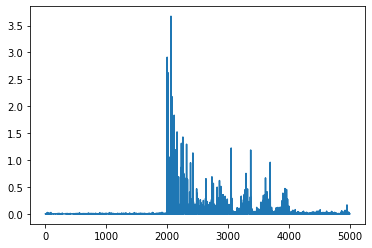

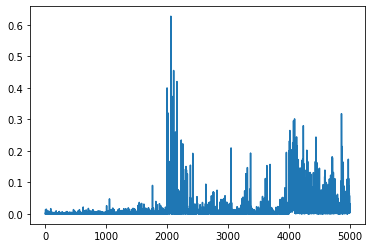

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
wb=xlrd.open_workbook("/content/caracteristicas.xlsx")
sheet = wb.sheet_by_index(0)
axx=sheet.col_values(1,start_rowx=1)
ayy=sheet.col_values(2,start_rowx=1)
clases=np.array(sheet.col_values(3,start_rowx=1))
plt.plot(axx)
plt.figure()
plt.plot(ayy)

In [25]:
print(clases)

[1.23259516e-32 2.05000000e-04 1.38100000e-03 ... 1.62400000e-03
 8.21000000e-04 7.29000000e-04]


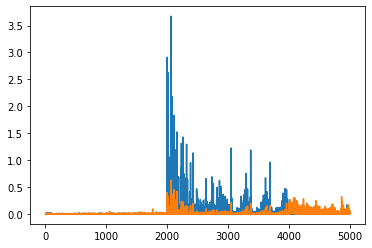

In [26]:
from sklearn.model_selection import train_test_split
X=np.array([axx,ayy])
X=X.transpose()
plt.plot(X)

División del dataset

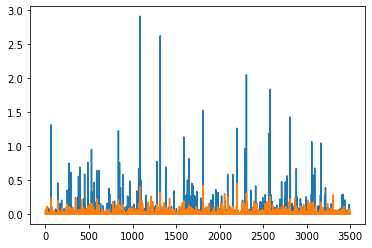

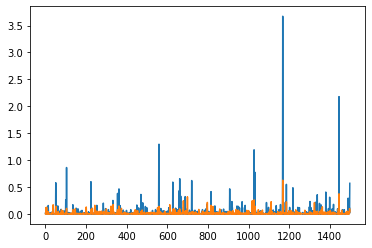

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,clases,test_size=0.3)
plt.plot(X_train)
plt.figure()
plt.plot(X_test)

Clases del grupo de prueba



In [28]:
print(y_test)

[2.16400e-03 2.09000e-04 6.90000e-05 ... 1.79090e-02 8.66100e-03
 1.09564e-01]
